# Questions

# 1.a

In [1]:
import matplotlib.pyplot as plt
import collections
import networkx as nx
import numpy as np
import scipy as sp
import random

# progress bar
from ipywidgets import IntProgress
from IPython.display import display

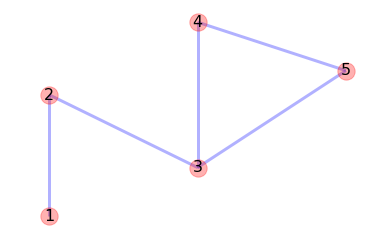

In [2]:
G = nx.Graph()

# Add network
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(3, 5)
G.add_edge(4, 5)

# set layout
pos = {1:(1,1),2:(1,3.5),3:(2,2),4:(2,5),5:(3,4)}

# draw nodes
nx.draw_networkx_nodes(G, pos, alpha=0.3)

# draw edges
nx.draw_networkx_edges(G, pos, width=3, alpha=0.3, edge_color='b')

# draw labels
nx.draw_networkx_labels(G, pos, font_size=16)

# plot plot
plt.axis('off')
plt.show()


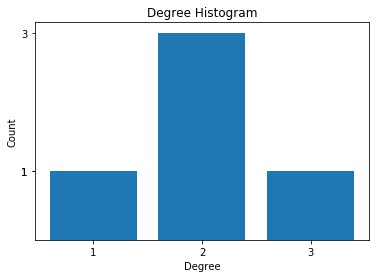

In [3]:
# Degree histogram
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt)

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d for d in deg])
ax.set_yticks([c for c in cnt])
plt.show()

# 1.b

In [4]:
# create adjacency matrix
amatrix = nx.adjacency_matrix(G)
amatrix = amatrix.todense()
print(amatrix)

[[0 1 0 0 0]
 [1 0 1 0 0]
 [0 1 0 1 1]
 [0 0 1 0 1]
 [0 0 1 1 0]]


# 1.c

In [5]:
# degree centrality
# the sum of the line of the adjency matrix corresponding to each node, divided by (the number of nodes -1) 
print("the degree centrality for nodes")
degree_centrality = {}
for i in range(len(amatrix)):
    degree_centrality[i+1] = np.sum(amatrix[i])/(len(amatrix)-1)
print(degree_centrality,"\n")

# degree closeness
# per node the sum of te closest distances to other nodes, divided by the nodes-1, to the power -1
print("the closeness centrality for nodes")
closeness_centrality ={}
closeness_centrality[1] = ((1+2+3+3)/4)**-1
closeness_centrality[2] = ((1+1+2+2)/4)**-1
closeness_centrality[3] = ((2+1+1+1)/4)**-1
closeness_centrality[4] = ((1+1+2+3)/4)**-1
closeness_centrality[5] = ((1+1+2+3)/4)**-1
print(closeness_centrality)

the degree centrality for nodes
{1: 0.25, 2: 0.5, 3: 0.75, 4: 0.5, 5: 0.5} 

the closeness centrality for nodes
{1: 0.4444444444444444, 2: 0.6666666666666666, 3: 0.8, 4: 0.5714285714285714, 5: 0.5714285714285714}


In [6]:
# calculated using a library to check for correctness
print("the degree centrality for nodes")
print(nx.degree_centrality(G),"\n")
print("the closeness centrality for nodes")
print(nx.closeness_centrality(G))

the degree centrality for nodes
{1: 0.25, 2: 0.5, 3: 0.75, 4: 0.5, 5: 0.5} 

the closeness centrality for nodes
{1: 0.4444444444444444, 2: 0.6666666666666666, 3: 0.8, 4: 0.5714285714285714, 5: 0.5714285714285714}


# 1.d

In [7]:
print("The vector of the degree per vertex:")
for i in range(len(amatrix)):
    print("node",i+1,"->",np.sum(amatrix[i]))

The vector of the degree per vertex:
node 1 -> 1
node 2 -> 2
node 3 -> 3
node 4 -> 2
node 5 -> 2


# 1.e

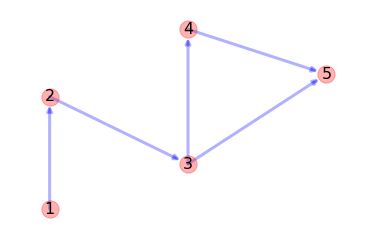

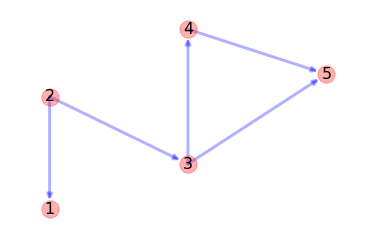

In [8]:
H = nx.DiGraph()

# Add network
H.add_edge(1, 2)
H.add_edge(2, 3)
H.add_edge(3, 4)
H.add_edge(3, 5)
H.add_edge(4, 5)

pos = {1:(1,1),2:(1,3.5),3:(2,2),4:(2,5),5:(3,4)}
nx.draw_networkx_nodes(H, pos, alpha=0.3)
nx.draw_networkx_edges(H, pos, width=3, alpha=0.3, edge_color='b')
nx.draw_networkx_labels(H, pos, font_size=16)
plt.axis('off')
plt.show()


H = nx.DiGraph()

# Add network
H.add_edge(2, 1)
H.add_edge(2, 3)
H.add_edge(3, 4)
H.add_edge(3, 5)
H.add_edge(4, 5)

pos = {1:(1,1),2:(1,3.5),3:(2,2),4:(2,5),5:(3,4)}
nx.draw_networkx_nodes(H, pos, alpha=0.3)
nx.draw_networkx_edges(H, pos, width=3, alpha=0.3, edge_color='b')
nx.draw_networkx_labels(H, pos, font_size=16)
plt.axis('off')
plt.show()



As can be seen from the two plotted networks, between node 1 and node 2 only two possible directions can exist. In the top plot, from node 2 node 1 can't be reached. In the bottom plot, from node 1 node 2 can't be reached. Thus, no such ’directionalization’ exists such that from all vertices you could reach (or infect) the entire network.

# 1.f

In [9]:
# https://www.geeksforgeeks.org/clustering-coefficient-graph-theory/
print("Local clustering coefficient")
print(nx.clustering(G))

Local clustering coefficient
{1: 0, 2: 0, 3: 0.3333333333333333, 4: 1.0, 5: 1.0}


# 1.g

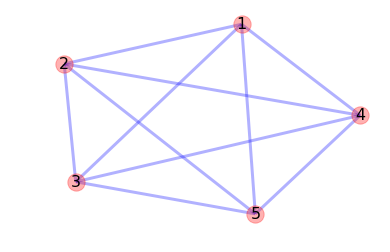

5 edges need to be added for the following local clustering coefficients:
{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0}


In [10]:
G = nx.Graph()

# add network
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(3, 5)
G.add_edge(4, 5)

# add minimum number of edges (5) so that the clustering coefficient is 1 for every vertex
# this is the minimum because every vertex has to be connected to overy other vertex
G.add_edge(1, 3)
G.add_edge(1, 4)
G.add_edge(1, 5)
G.add_edge(2, 4)
G.add_edge(2, 5)

# set layout
pos = nx.spring_layout(G)

# draw nodes
nx.draw_networkx_nodes(G, pos, alpha=0.3)

# draw edges
nx.draw_networkx_edges(G, pos, width=3, alpha=0.3, edge_color='b')

# draw labels
nx.draw_networkx_labels(G, pos, font_size=16)

# plot plot
plt.axis('off')
plt.show()

print("5 edges need to be added for the following local clustering coefficients:")
print(nx.clustering(G))

# 2.a

![title](lab7_img/2a.jpg)

The right type of probability distribution is binominal


# 2.b

t = clustering coefficient

P = kans op edge

$$
\binom{\binom{k}{2}}{t\cdot \binom{k}{2}}\cdot P^{t\cdot \binom{k}{2}}\cdot (1-P)^{\binom{k}{2}-t\cdot \binom{k}{2}}
$$

# 2.c

# 2.d

# 2.e

This expected degree is 50

![title](lab7_img/2e.jpg)

# Epidemics

# 1.a

In [11]:
def prob_not_infected(i,r):
    return (1-i)**r

def prob_infected(i,r):
    return (1-prob_not_infected(i,r))

i = 0.5
r = 2

print("prob not infected:",prob_not_infected(i,r))
print("prob infected:",prob_infected(i,r))

prob not infected: 0.25
prob infected: 0.75


# 1.b

In [12]:
# function for plotting
def plot1b(N,k,i,initial_infected_prob,timesteps):
    # create network
    G = nx.fast_gnp_random_graph(N,k / N)

    # infect initial nodes
    for node in range(N):
        if random.random() < initial_infected_prob:
            G.nodes[node]['infected'] = True
        else:
            G.nodes[node]['infected'] = False

    infected_nodes = []

    # initiate progress bar
    f = IntProgress(min=1, max=timesteps)
    display(f)

    # perform timesteps
    for x in range(timesteps):
        # for all nodes
        infected_per_timestep = 0
        for node in range(N):
            if G.nodes[node]['infected'] is True:
                infected_per_timestep += 1
            # for all neighbors
            neighbors = nx.all_neighbors(G,node)
            infected_neighbors = 0
            for neighbor in neighbors:
                if G.nodes[neighbor]['infected'] is True:
                    infected_neighbors += 1
            # infect node if needed
            if random.random() < prob_infected(i,infected_neighbors):
                G.nodes[node]['infected'] = True
        infected_nodes.append(infected_per_timestep/N)
        f.value = x+1 # update progress bar

    return infected_nodes

In [13]:
# set variables
initial_infected_prob = 0.001
timesteps = 300

# case i
N = 10**4
k = 5.0
i = 0.01
print("calculation progress case i")
case_i = plot1b(N,k,i,initial_infected_prob,timesteps)

# case ii
N = 10**4
k = 0.8
i = 0.1
print("calculation progress case ii")
case_ii = plot1b(N,k,i,initial_infected_prob,timesteps)

calculation progress case i


IntProgress(value=1, max=300, min=1)

calculation progress case ii


IntProgress(value=1, max=300, min=1)

[]

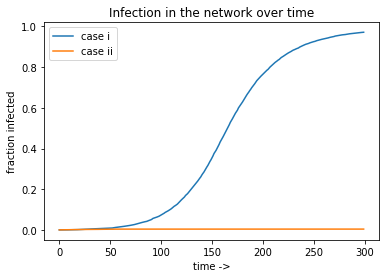

In [14]:
# plot
plt.xlabel("time ->")
plt.ylabel("fraction infected")
plt.title("Infection in the network over time")
plt.plot(case_i, label = 'case i')
plt.plot(case_ii, label = 'case ii')
plt.legend()
plt.plot()

One run already gets a smooth curve =)

# 1.c

Because < k > is smaller than 1 (this is called subcritical) there is no giant component, thus no speading across the network. The infection stays and grows only local.

# 1.d

In [15]:
def prob_that_vertex_with_k_neighbors_infects_at_least_one(i,k):
    return 1-((1-i)**k)

i = 0.5
k = 2
print("prob_that_vertex_with_k_neighbors_infects_at_least_one: ",end="")
print(prob_that_vertex_with_k_neighbors_infects_at_least_one(i,k))

prob_that_vertex_with_k_neighbors_infects_at_least_one: 0.75


# 1.e

# 1.f

# 1.h

In [16]:
def function_R0_over_time(N,k,i,initial_infected_prob,timesteps,n_simulations):

    # initiate progress bar
    f = IntProgress(min=0, max=(timesteps*n_simulations))
    count = 0
    display(f)

    R0_avg = [0]*(timesteps-1)

    # for every simulation
    for s in range(n_simulations):

        # create network
        G = nx.fast_gnp_random_graph(N,k / N)

        # infect initial nodes
        for node in range(N):
            if random.random() < initial_infected_prob:
                G.nodes[node]['infected'] = True
            else:
                G.nodes[node]['infected'] = False

        infected_nodes = []
        R0_over_time = []

        # perform timesteps
        for t in range(timesteps):

            # for all nodes
            infected_per_timestep = 0
            infected_after_timestep = 0
            for node in range(N):

                # count infected nodes before timestep
                if G.nodes[node]['infected'] is True:
                    infected_per_timestep += 1

                # for all neighbors
                neighbors = nx.all_neighbors(G,node)
                infected_neighbors = 0
                for neighbor in neighbors:
                    if G.nodes[neighbor]['infected'] is True:
                        infected_neighbors += 1

                # infect node if needed
                if random.random() < prob_infected(i,infected_neighbors):
                    G.nodes[node]['infected'] = True

                # count infected nodes after timestep
                if G.nodes[node]['infected'] is True:
                    infected_after_timestep += 1

            # calculate and save R0
            if t < timesteps:
                R0_over_time.append( (infected_after_timestep-infected_per_timestep) / (infected_per_timestep) )

            infected_nodes.append(infected_per_timestep/N)

            count += 1
            f.value = count # update progress bar

        # append R0_over_time to R0_avg
        for _ in range(timesteps-1):
            R0_avg[_] += R0_over_time[_]

    # average R0_avg by dividing by n_simulations
    for value in range(timesteps-1):
        R0_avg[value] = R0_avg[value]/n_simulations

    return R0_avg

In [17]:
# set variables
initial_infected_prob = 0.1 # should be 0.001, set to lower value for testing since N can than be lower
timesteps = 100
n_simulations = 15

# case i
N = 10**3 # should be 10**5, but set to lower value for emulation speed
k = 5.0
i = 0.01
print("calculation progress case i")
case_i = function_R0_over_time(N,k,i,initial_infected_prob,timesteps,n_simulations)

# case ii
N = 10**3 # should be 10**5, but set to lower value for emulation speed
k = 0.8
i = 0.1
print("calculation progress case ii")
case_ii = function_R0_over_time(N,k,i,initial_infected_prob,timesteps,n_simulations)

calculation progress case i


IntProgress(value=0, max=1500)

calculation progress case ii


IntProgress(value=0, max=1500)

[]

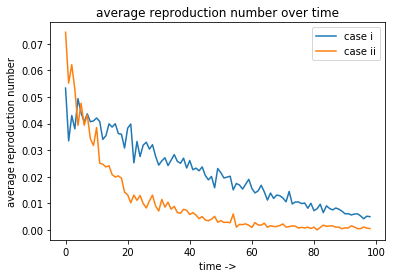

In [18]:
# plot
plt.xlabel("time ->")
plt.ylabel("average reproduction number")
plt.title("average reproduction number over time")
plt.plot(case_i,label = 'case i')
plt.plot(case_ii,label = 'case ii')
plt.legend()
plt.plot()

# 1.g
placed after h because it uses the function defined there

In [19]:
# set variables
initial_infected_prob = 0.001
timesteps = 3
n_simulations = 20

# case i
N = 10**5 # should be 10**5, but set to lower value for emulation speed
k = 5.0
i = 0.01
print("calculation progress case i")
case_i = function_R0_over_time(N,k,i,initial_infected_prob,timesteps,n_simulations)

# case ii
N = 10**5 # should be 10**5, but set to lower value for emulation speed
k = 0.8
i = 0.1
print("calculation progress case ii")
case_ii = function_R0_over_time(N,k,i,initial_infected_prob,timesteps,n_simulations)

calculation progress case i


IntProgress(value=0, max=60)

calculation progress case ii


IntProgress(value=0, max=60)

In [20]:
# beginning is 3 timesteps
# takes the average over n_simulations

print("R0 in beginning case i:",sum(case_i)/float(len(case_i)))
print("R0 in beginning case ii:",sum(case_ii)/float(len(case_ii)))

R0 in beginning case i: 0.05049026257155351
R0 in beginning case ii: 0.07081937557444035


# 1.i